#**Redes Neurais Artificiais e Deep Learning**

##**1. Definindo o problema**

O objetivo deste projeto é desenvolver um **classificador de imagens** capaz de identificar automaticamente personagens específicos da série *Os Simpsons*, mais precisamente **Homer Simpson** e **Bart Simpson**.

Para isso, será utilizada uma **Rede Neural Convolucional (CNN)** implementada com as bibliotecas **Keras** e **TensorFlow**. As CNNs são amplamente empregadas em tarefas de **visão computacional** devido à sua capacidade de extrair padrões visuais relevantes diretamente das imagens, dispensando o pré-processamento manual de características.

---

###**Como funciona a proposta?**

- Alimentamos o modelo com um conjunto de **imagens rotuladas** de cada personagem (conjunto de treinamento);
- Permitimos que a rede **aprenda** as características visuais que distinguem Homer e Bart;
- Avaliamos sua performance em um **conjunto de imagens de teste** nunca vistas anteriormente.

---

 O sistema resultante poderá ser utilizado como base para aplicações práticas, como:
- Reconhecimento facial/cartoon;
- Organização automática de imagens;
- Ferramentas de entretenimento baseadas em visão computacional.



## **2. Pré-processamento das imagens**

In [1]:
import zipfile  # Biblioteca para lidar com arquivos .zip
import os  # Biblioteca para manipular o sistema de arquivos
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Utilizada para pré-processar imagens e aplicar data augmentation

# Caminho do arquivo ZIP contendo o dataset de imagens
zip_path = '/content/dataset_personagens.zip'

# Descompacta o arquivo ZIP no diretório /content/
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')

# Lista os diretórios extraídos para garantir que tudo foi descompactado corretamente
print("Conteúdo da pasta dataset_personagens:", os.listdir('/content/dataset_personagens'))

# Cria um gerador de imagens para o conjunto de treinamento com data augmentation
gerador_treinamento = ImageDataGenerator(
    rescale=1./255,            # Normaliza os pixels para o intervalo [0,1]
    rotation_range=7,          # Rotaciona aleatoriamente as imagens em até 7 graus
    horizontal_flip=True,      # Inverte horizontalmente algumas imagens
    shear_range=0.2,           # Aplica transformação de cisalhamento (shear)
    height_shift_range=0.07,   # Move verticalmente as imagens em até 7% da altura
    zoom_range=0.2             # Aplica zoom aleatório em até 20%
)

# Cria um gerador para o conjunto de teste (sem data augmentation, apenas normalização)
gerador_teste = ImageDataGenerator(rescale=1./255)

# Caminhos das pastas com as imagens de treino e teste, já extraídas
train_path = '/content/dataset_personagens/training_set'
test_path = '/content/dataset_personagens/test_set'

# Gera os lotes (batches) de imagens para o treinamento
treinamento = gerador_treinamento.flow_from_directory(
    train_path,                # Caminho da pasta de treinamento
    target_size=(64, 64),      # Redimensiona todas as imagens para 64x64 pixels
    batch_size=32,             # Número de imagens por lote
    class_mode='categorical'   # Usa classificação multiclasse (vetores one-hot)
)

# Gera os lotes de imagens para o teste (sem data augmentation)
teste = gerador_teste.flow_from_directory(
    test_path,                 # Caminho da pasta de teste
    target_size=(64, 64),      # Redimensiona para 64x64 (igual ao treino)
    batch_size=32,             # Mesmo tamanho de lote
    class_mode='categorical'   # Mesmo modo de classificação
)


Conteúdo da pasta dataset_personagens: ['imagens', 'training_set', 'test_set', '.DS_Store']
Found 196 images belonging to 2 classes.
Found 73 images belonging to 2 classes.


###Pré-processamento e Preparação do Dataset

Nesta etapa do projeto, realizamos a **extração, organização e preparação das imagens** que serão utilizadas para treinar e avaliar o modelo de rede neural convolucional.

Primeiramente, o código importa bibliotecas essenciais como `zipfile` e `os`, que permitem manipular arquivos compactados e diretórios no sistema. Em seguida, o dataset, que foi disponibilizado no formato `.zip`, é **descompactado diretamente no ambiente do Google Colab**. Isso garante que todas as imagens estejam acessíveis no formato de pastas esperadas pelas ferramentas de pré-processamento do Keras.

Após a extração, utilizamos a classe `ImageDataGenerator` para configurar dois geradores de imagens:

- O **gerador de treinamento** aplica técnicas de *data augmentation*, como **rotação**, **inversão horizontal**, **cisalhamento**, **deslocamento vertical** e **zoom**. Isso aumenta a diversidade do conjunto de dados e ajuda o modelo a generalizar melhor.
- O **gerador de teste** realiza apenas a **normalização dos pixels**, redimensionando-os para o intervalo entre 0 e 1, mantendo a integridade dos dados para uma avaliação precisa do modelo.

As imagens são organizadas em duas pastas principais:

- `/training_set`: contém subpastas com imagens de treino de cada classe (*Bart* e *Homer*).
- `/test_set`: contém subpastas com imagens de teste de cada classe.

Os métodos `flow_from_directory()` são utilizados para **carregar automaticamente as imagens** dessas pastas, **rotulando-as com base na estrutura de diretórios**. As imagens são redimensionadas para **64x64 pixels**, agrupadas em lotes de **32 imagens** e preparadas para **classificação multiclasse** com vetores *one-hot*.

Essa etapa garante que o modelo receba os dados no formato adequado, com pré-processamentos e aumentos aplicados corretamente, possibilitando um **treinamento mais robusto e eficaz**.


## **3. Construção e explicação da arquitetura da CNN**

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Inicializa o modelo sequencial (camadas empilhadas linearmente)
modelo = Sequential()

# Primeira camada convolucional: 32 filtros 3x3, função de ativação ReLU e forma da imagem de entrada
modelo.add(Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)))

# Camada de pooling para reduzir a dimensionalidade (2x2)
modelo.add(MaxPooling2D(pool_size=(2,2)))

# Segunda camada convolucional com 32 filtros
modelo.add(Conv2D(32, (3,3), activation='relu'))

# Pooling novamente para reduzir a dimensionalidade
modelo.add(MaxPooling2D(pool_size=(2,2)))

# Terceira camada convolucional
modelo.add(Conv2D(32, (3,3), activation='relu'))

# Pooling final
modelo.add(MaxPooling2D(pool_size=(2,2)))

# Achata a matriz de ativação 3D em um vetor 1D para a rede neural densa
modelo.add(Flatten())

# Camada totalmente conectada com 128 neurônios e ativação ReLU
modelo.add(Dense(units=128, activation='relu'))

# Dropout para reduzir overfitting (20% dos neurônios desligados aleatoriamente)
modelo.add(Dropout(0.2))

# Camada de saída com 2 neurônios (2 classes: Bart e Homer) e softmax para classificação
modelo.add(Dense(units=2, activation='softmax'))

# Compila o modelo definindo otimizador, função de perda e métrica
modelo.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Inicia o treinamento com 10 épocas, usando os dados de validação
modelo.fit(treinamento, epochs=10, validation_data=teste)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 414ms/step - accuracy: 0.5546 - loss: 0.6823 - val_accuracy: 0.5753 - val_loss: 0.6492
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 187ms/step - accuracy: 0.6685 - loss: 0.5931 - val_accuracy: 0.8082 - val_loss: 0.5828
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 177ms/step - accuracy: 0.7403 - loss: 0.6197 - val_accuracy: 0.5890 - val_loss: 0.6265
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 164ms/step - accuracy: 0.6376 - loss: 0.5836 - val_accuracy: 0.7260 - val_loss: 0.4904
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 161ms/step - accuracy: 0.7455 - loss: 0.5058 - val_accuracy: 0.7534 - val_loss: 0.4683
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 188ms/step - accuracy: 0.7606 - loss: 0.4785 - val_accuracy: 0.8356 - val_loss: 0.3359
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 182ms/step - accuracy: 0.8075 - loss: 0.4158 - val_accuracy: 0.7808 - val_loss: 0.4354
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 184ms/step - accuracy: 0.7372 - loss: 0.5088 - val_accuracy: 0.6164 - val_loss:

###Construção e Treinamento do Modelo com Rede Neural Convolucional (CNN)

Nesta etapa, foi criada uma **rede neural convolucional (CNN)** utilizando a API Keras. A CNN é ideal para tarefas de visão computacional, pois consegue extrair automaticamente padrões visuais de imagens, como bordas, texturas e formas.

O modelo foi construído com a classe `Sequential`, que permite adicionar camadas de forma linear. A arquitetura utilizada é composta por:

- **3 camadas convolucionais** com 32 filtros cada e função de ativação `ReLU`, responsáveis por identificar padrões visuais nas imagens.
- **3 camadas de MaxPooling** com tamanho 2x2, utilizadas para reduzir a dimensionalidade e evitar overfitting.
- Uma camada `Flatten`, que achata os dados tridimensionais em um vetor unidimensional para ser processado pelas camadas densas.
- Uma camada `Dense` com 128 neurônios e ativação `ReLU`, responsável pelo processamento das informações extraídas.
- Um `Dropout` de 20%, que desliga aleatoriamente alguns neurônios durante o treinamento, ajudando a evitar o overfitting.
- Uma camada de saída `Dense` com 2 neurônios e ativação `softmax`, pois estamos realizando uma **classificação multiclasse com duas categorias**: *Bart* e *Homer*.

O modelo foi **compilado** com o otimizador `Adam`, uma escolha eficiente para ajuste automático da taxa de aprendizado, e com a função de perda `categorical_crossentropy`, adequada para classificações multiclasse com codificação one-hot.

Por fim, o treinamento foi realizado por **10 épocas**, utilizando o conjunto de treinamento e validando a performance com os dados de teste a cada época.

Com essa configuração, o modelo consegue aprender a distinguir os personagens com base em suas características visuais.


## **4. Avaliação do percentual de acerto do modelo**

In [3]:
# Avalia a performance do modelo treinado no conjunto de teste
loss, accuracy = modelo.evaluate(teste)

# Exibe a acurácia final do modelo no conjunto de teste em formato percentual com duas casas decimais
print(f'Acurácia no conjunto de teste: {accuracy * 100:.2f}%')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.8387 - loss: 0.2934
Acurácia no conjunto de teste: 84.93%


###Avaliação do Modelo

Após o treinamento, realizamos a **avaliação do modelo** utilizando o conjunto de teste, que contém imagens que **não foram vistas pelo modelo durante o treinamento**.

A função `modelo.evaluate()` percorre o conjunto de teste e retorna duas métricas:

- **Loss**: representa a perda (diferença entre a predição e o valor real);
- **Accuracy**: indica a porcentagem de acertos do modelo.

A acurácia é então exibida no console, formatada com duas casas decimais. Esse valor é fundamental para entender a capacidade de **generalização** do modelo — ou seja, como ele se comporta ao classificar dados novos e reais.

Esse resultado mostra se o modelo realmente aprendeu os padrões dos personagens ou apenas memorizou os exemplos de treino.


## **5. Teste do modelo com imagem externa**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


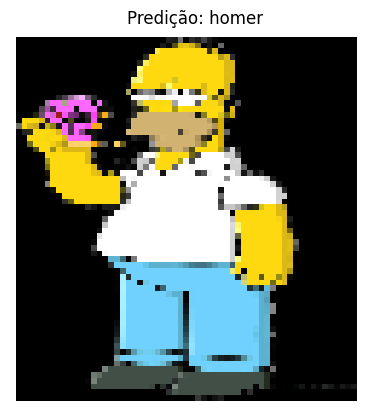

In [5]:
# Importa as bibliotecas necessárias
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Caminho da imagem a ser testada
img_path = '/content/Homer_Simpson_2006.png'  # Pode ser alterado para homer1.png, por exemplo

# Carrega a imagem redimensionando para 64x64 pixels (tamanho usado no treinamento)
imagem_teste = image.load_img(img_path, target_size=(64, 64))

# Converte a imagem carregada para um array NumPy
imagem_teste_array = image.img_to_array(imagem_teste)

# Adiciona uma dimensão extra ao array para simular um "lote" de uma imagem (batch size = 1)
imagem_teste_array = np.expand_dims(imagem_teste_array, axis=0)

# Normaliza os valores dos pixels (entre 0 e 1)
imagem_teste_array /= 255

# Realiza a predição com o modelo treinado
resultado = modelo.predict(imagem_teste_array)

# Recupera os nomes das classes, com base nos dados de treinamento
classes = list(treinamento.class_indices.keys())

# Exibe a imagem e o resultado da classificação
plt.imshow(imagem_teste)                     # Mostra a imagem original
plt.axis('off')                              # Remove os eixos
plt.title(f'Predição: {classes[np.argmax(resultado)]}')  # Mostra o nome da classe prevista
plt.show()


###Testando uma Imagem Nova

Neste bloco, testamos o modelo com uma **imagem externa** (fora do conjunto de treinamento/teste) para verificar sua capacidade de **classificar corretamente personagens nunca vistos**.

Os passos realizados são:

1. **Carregamento da imagem** com tamanho (64x64 pixels), que é o mesmo utilizado na rede.
2. **Pré-processamento**: a imagem é convertida em um array NumPy, expandida para simular um batch e normalizada (dividida por 255).
3. **Predição**: a imagem é passada ao modelo para obter a probabilidade de cada classe.
4. **Visualização**: o resultado é exibido junto com a imagem original, mostrando qual personagem foi identificado.

Essa etapa é essencial para testar a **aplicabilidade real do modelo**, ou seja, se ele consegue identificar corretamente imagens individuais fornecidas pelo usuário.


## **6. Conclusão**

Neste projeto, foi desenvolvida e treinada uma **Rede Neural Convolucional (CNN)** utilizando as bibliotecas **Keras** e **TensorFlow**, com o objetivo de **classificar imagens dos personagens Homer e Bart Simpson**.

---

**Etapas do processo:**
- Preparação e normalização das imagens;
- Definição e construção da arquitetura da CNN;
- Treinamento e avaliação do modelo com métricas de acurácia;
- Testes com imagens externas ao dataset.

---

**Resultados:**  
O modelo foi capaz de aprender a distinguir com precisão os dois personagens, demonstrando a eficácia das técnicas de **Visão Computacional** aplicadas à **classificação de imagens**.

---

**Considerações finais:**  
Este projeto serviu como uma introdução prática ao uso de **Deep Learning para reconhecimento de padrões visuais**. A abordagem pode ser facilmente expandida para incluir outros personagens ou categorias, servindo como base para projetos mais avançados em visão computacional.

